In [1]:
# %pip install plotly

In [2]:
# %pip install --upgrade nbformat

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# imports
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import pathlib
import os
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time


In [4]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm

from shapely.geometry import box

In [5]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    # r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
catalog

<Client id=gca-catalog>

In [6]:
list(catalog.get_collections())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Exp_world_pop_parquet>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>,
 <CollectionClient id=Haz-ERA5_93-23>,
 <CollectionClient id=Vul_World_Protected_Areas>,
 <CollectionClient id=Haz-MRI-ESM2-0_Hind_93-14>,
 <CollectionClient id=Haz-MPI-ESM1-2-LR_Hind_93-14>,
 <CollectionCl

In [7]:
collection=catalog.get_child("Haz-TC_CAT3_RP")
collection

<CollectionClient id=Haz-TC_CAT3_RP>

In [8]:
href = collection.assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:                        (latitude: 68, longitude: 138)
Coordinates:
  * latitude                       (latitude) uint8 2 3 4 5 6 ... 65 66 67 68 69
  * longitude                      (longitude) int16 -124 -123 -122 ... 11 12 13
Data variables:
    TC_RP_map_96kts_FC_2050_RCP85  (latitude, longitude) float64 dask.array<chunksize=(68, 138), meta=np.ndarray>
    TC_RP_map_96kts_FC_2100_RCP45  (latitude, longitude) float64 dask.array<chunksize=(68, 138), meta=np.ndarray>
    TC_RP_map_96kts_PC             (latitude, longitude) float64 dask.array<chunksize=(68, 138), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Nederhoff, K.
    CITATION:            Nederhoff, K., Hoek, J., Leijnse, T., van Ormondt, M...
    COMMENT:             1 x 1 degree resolution
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The dataset includes a return period wind map for wi...
    ...                  ...
    SPATIAL_EXTENT:      ['-180', '-90', '180', '90']
    TAGS:                ['tropical cyclones', 'synthetic tracks', 'wind and ...
    TEMPORAL_EXTENT:     ['1979-01-01T00:00:00Z', '2100-12-31T23:59:59Z']
    TITLE:               TCWISE 1000year Generated category 3 Tropical cyclon...
    TITLE_ABBREVIATION:  Cat3_wind_map
    UNITS:               Years

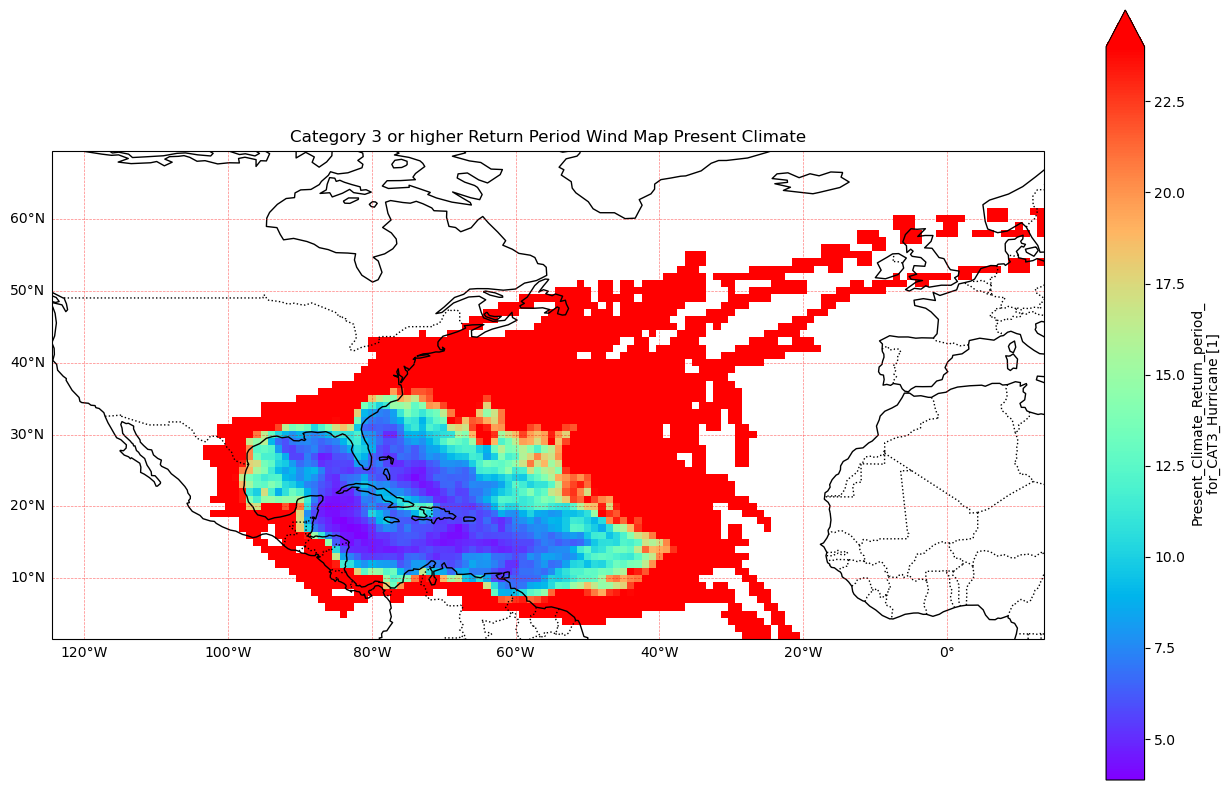

In [21]:
# ds["TC_RP_map_96kts_PC"].plot()

plt.figure(figsize=(16, 10))

# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds["TC_RP_map_96kts_PC"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='rainbow', vmax=24)

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
plt.title('Category 3 or higher Return Period Wind Map Present Climate')

# Show the plot
plt.show()

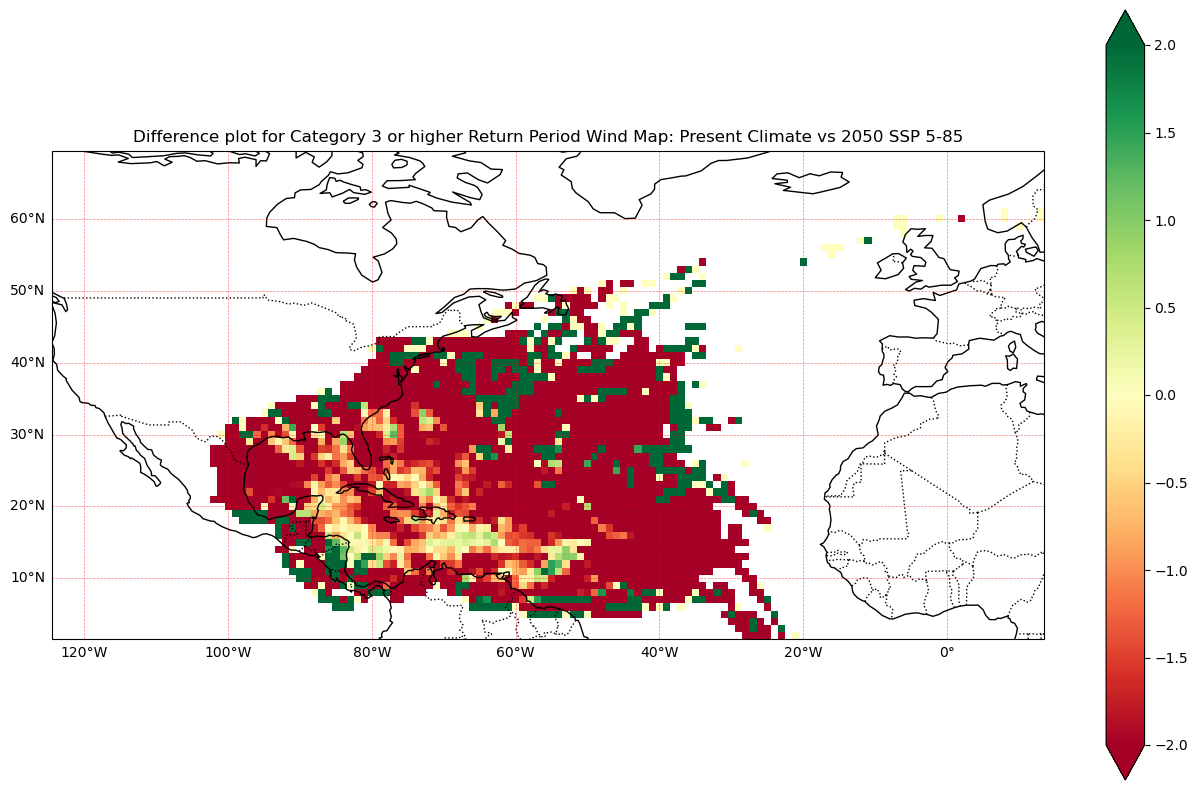

In [22]:
# ds["TC_RP_map_96kts_PC"].plot()

plt.figure(figsize=(16, 10))
 
# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
#ds["delta_TC_RP_map_96kts_PC"]=
(ds["TC_RP_map_96kts_FC_2050_RCP85"]-ds["TC_RP_map_96kts_PC"]).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmax=2, vmin=-2)

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title


plt.title('Difference plot for Category 3 or higher Return Period Wind Map: Present Climate vs 2050 SSP 5-85')

# Show the plot
plt.show()

In [92]:
#Change longitude coordinate
# def longitude_coverter(lon):
#     if lon <0:
#         lon=lon+360
#     else:
#         lon=lon
#     return lon

#########################################
#LONGITUDE CONVERSION NOT NECESSARY AS WITH PREVIOUS TCWise
#########################################


def longitude_coverter(lon):

    return lon

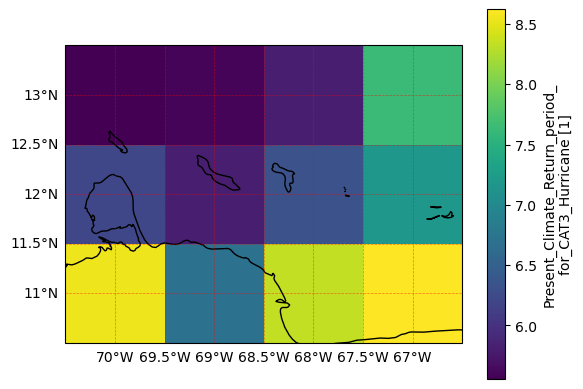

In [93]:

lon_min=-66.985558489
lon_max=-70.897144235

var="TC_RP_map_96kts_PC"
time_step=0
lat_min=10.641308809
lat_max=13.734711864


# #Change longitude coordinate
# def longitude_coverter(lon_min, lon_max)
#     lon_span=[lon_min,lon_max]

#     for i,lon in enumerate(lon_span):
#         if lon <0:
#             lon_span[i]=lon+360
#         else:
#             lon_span[i]=lon
#     return lon_span

# #Change longitude coordinate
# def longitude_coverter(lon):
#         if lon <0:
#             lon=lon+360
#         else:
#             lon=lon
#         return lon

lon_span=[longitude_coverter(lon_min),longitude_coverter(lon_max)]





# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.sel(longitude=slice(np.min(lon_span),np.max(lon_span)),latitude=slice(lat_min,lat_max))[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

create a scatterplot

In [94]:
template_df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template.csv")
template_df.head()

transect_id country_id      continent country_name  Start_lon  Start_lat  \
0  BOX_028_183_0        CHL  South America        Chile -74.386310 -50.377659   
1  BOX_028_183_1        CHL  South America        Chile -74.382469 -50.379144   
2  BOX_028_183_2        CHL  South America        Chile -74.378628 -50.380629   
3  BOX_028_183_3        CHL  South America        Chile -74.373950 -50.382583   
4  BOX_028_183_4        CHL  South America        Chile -74.370425 -50.384358   

   Intersect_lon  Intersect_lat    End_lon    End_lat  
0     -74.390966     -50.382558 -74.395623 -50.387456  
1     -74.387125     -50.384042 -74.391782 -50.388940  
2     -74.383284     -50.385527 -74.387941 -50.390425  
3     -74.379517     -50.387079 -74.385083 -50.391574  
4     -74.375991     -50.388853 -74.381558 -50.393348

In [95]:

circle_center_all = gpd.GeoDataFrame(
    template_df, geometry=gpd.points_from_xy(template_df.Intersect_lon, template_df.Intersect_lat), crs="EPSG:4326"
)
circle_center_all.head()

transect_id country_id      continent country_name  Start_lon  Start_lat  \
0  BOX_028_183_0        CHL  South America        Chile -74.386310 -50.377659   
1  BOX_028_183_1        CHL  South America        Chile -74.382469 -50.379144   
2  BOX_028_183_2        CHL  South America        Chile -74.378628 -50.380629   
3  BOX_028_183_3        CHL  South America        Chile -74.373950 -50.382583   
4  BOX_028_183_4        CHL  South America        Chile -74.370425 -50.384358   

   Intersect_lon  Intersect_lat    End_lon    End_lat  \
0     -74.390966     -50.382558 -74.395623 -50.387456   
1     -74.387125     -50.384042 -74.391782 -50.388940   
2     -74.383284     -50.385527 -74.387941 -50.390425   
3     -74.379517     -50.387079 -74.385083 -50.391574   
4     -74.375991     -50.388853 -74.381558 -50.393348   

                      geometry  
0  POINT (-74.39097 -50.38256)  
1  POINT (-74.38713 -50.38404)  
2  POINT (-74.38328 -50.38553)  
3  POINT (-74.37952 -50.38708)  
4  POINT (-74.37599 -50.38885)

In [96]:
IPCC=gpd.read_file(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\IPCC-WGI-reference-regions-v4.gpkg")
IPCC.head()

Continent  Type               Name Acronym  \
0          POLAR  Land  Greenland/Iceland     GIC   
1  NORTH-AMERICA  Land  N.W.North-America     NWN   
2  NORTH-AMERICA  Land  N.E.North-America     NEN   
3  NORTH-AMERICA  Land    W.North-America     WNA   
4  NORTH-AMERICA  Land    C.North-America     CNA   

                                            geometry  
0  MULTIPOLYGON (((-10.00000 62.00000, -10.43750 ...  
1  MULTIPOLYGON (((-105.00000 50.00000, -105.4386...  
2  MULTIPOLYGON (((-50.00000 50.00000, -50.44000 ...  
3  MULTIPOLYGON (((-130.00000 50.00000, -129.5614...  
4  MULTIPOLYGON (((-90.00000 50.00000, -90.00000 ...

In [97]:
region_acronym= "CAR"
region_gdf=IPCC.loc[IPCC["Acronym"]==region_acronym,:]
region_gdf


Continent        Type       Name Acronym  \
8  CENTRAL-AMERICA  Land-Ocean  Caribbean     CAR   

                                            geometry  
8  MULTIPOLYGON (((-75.00000 12.00000, -75.32609 ...

In [98]:

# circle_center=region_gdf.sjoin(circle_center_all)
circle_center=circle_center_all.sjoin(region_gdf)
circle_center=circle_center.iloc[:,0:11]
circle_center.index=range(0,len(circle_center.index))
circle_center

transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat                    geometry  
0      12.243877  POINT (-71.87980 12.25068)  
1      12.242222  POINT (-71.87698 12.24731)  
2      12.242366  POINT (-71.87563 12.24314)  
3      12.237993  POINT (-71.87523 12.23877)  
4      12.233041  POINT (-71.87483 12.23440)  
...          ...                         ...  
37504  17.961363  POINT (-71.66819 17.96526)  
37505  17.958286  POINT (-71.66623 17.96142)  
37506  17.954311  POINT (-71.66458 17.95744)  
37507  17.950335  POINT (-71.66294 17.95347)  
37508  17.946359  POINT (-71.66129 17.94949)  

[37509 rows x 11 columns]

In [99]:
longitude_coverter(circle_center["Intersect_lon"].iloc[0])

-71.8798045985

In [100]:
#Filter each each ds for each df
ds_filtered=ds.sel(latitude=circle_center["Intersect_lat"].iloc[0],longitude=longitude_coverter(circle_center["Intersect_lon"].iloc[0]),method="nearest")
ds_filtered


<xarray.Dataset>
Dimensions:                        ()
Coordinates:
    latitude                       uint8 12
    longitude                      int16 -72
Data variables:
    TC_RP_map_96kts_FC_2050_RCP85  float64 dask.array<chunksize=(), meta=np.ndarray>
    TC_RP_map_96kts_FC_2100_RCP45  float64 dask.array<chunksize=(), meta=np.ndarray>
    TC_RP_map_96kts_PC             float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Nederhoff, K.
    CITATION:            Nederhoff, K., Hoek, J., Leijnse, T., van Ormondt, M...
    COMMENT:             1 x 1 degree resolution
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The dataset includes a return period wind map for wi...
    ...                  ...
    SPATIAL_EXTENT:      ['-180', '-90', '180', '90']
    TAGS:                ['tropical cyclones', 'synthetic tracks', 'wind and ...
    TEMPORAL_EXTENT:     ['1979-01-01T00:00:00Z', '2100-12-31T23:59:59Z']
    TITLE:               TCWISE 1000year Generated category 3 Tropical cyclon...
    TITLE_ABBREVIATION:  Cat3_wind_map
    UNITS:               Years

In [101]:
# x

In [102]:
circle_center["Lat_TCWise"]=0.0
circle_center["Lon_TCWise"]=0.0
circle_center["TC_RP_map_96kts_FC_2050_RCP85"]=0.0
circle_center["TC_RP_map_96kts_FC_2100_RCP45"]=0.0
circle_center["TC_RP_map_96kts_PC"]=0.0



circle_center

transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat                    geometry  Lat_TCWise  Lon_TCWise  \
0      12.243877  POINT (-71.87980 12.25068)         0.0         0.0   
1      12.242222  POINT (-71.87698 12.24731)         0.0         0.0   
2      12.242366  POINT (-71.87563 12.24314)         0.0         0.0   
3      12.237993  POINT (-71.87523 12.23877)         0.0         0.0   
4      12.233041  POINT (-71.87483 12.23440)         0.0         0.0   
...          ...                         ...         ...         ...   
37504  17.961363  POINT (-71.66819 17.96526)         0.0         0.0   
37505  17.958286  POINT (-71.66623 17.96142)         0.0         0.0   
37506  17.954311  POINT (-71.66458 17.95744)         0.0         0.0   
37507  17.950335  POINT (-71.66294 17.95347)         0.0         0.0   
37508  17.946359  POINT (-71.66129 17.94949)         0.0         0.0   

       TC_RP_map_96kts_FC_2050_RCP85  TC_RP_map_96kts_FC_2100_RCP45  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
37504                            0.0                            0.0   
37505                            0.0                            0.0   
37506                            0.0                            0.0   
37507                            0.0                            0.0   
37508                            0.0                            0.0   

       TC_RP_map_96kts_PC  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
37504                 0.0  
37505                 0.0  
37506                 0.0  
37507                 0.0  
37508                 0.0  

[37509 rows x 16 columns]

In [103]:
# ds_filtered["latitude"].values

In [104]:
ds

<xarray.Dataset>
Dimensions:                        (latitude: 68, longitude: 138)
Coordinates:
  * latitude                       (latitude) uint8 2 3 4 5 6 ... 65 66 67 68 69
  * longitude                      (longitude) int16 -124 -123 -122 ... 11 12 13
Data variables:
    TC_RP_map_96kts_FC_2050_RCP85  (latitude, longitude) float64 dask.array<chunksize=(68, 138), meta=np.ndarray>
    TC_RP_map_96kts_FC_2100_RCP45  (latitude, longitude) float64 dask.array<chunksize=(68, 138), meta=np.ndarray>
    TC_RP_map_96kts_PC             (latitude, longitude) float64 dask.array<chunksize=(68, 138), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Nederhoff, K.
    CITATION:            Nederhoff, K., Hoek, J., Leijnse, T., van Ormondt, M...
    COMMENT:             1 x 1 degree resolution
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The dataset includes a return period wind map for wi...
    ...                  ...
    SPATIAL_EXTENT:      ['-180', '-90', '180', '90']
    TAGS:                ['tropical cyclones', 'synthetic tracks', 'wind and ...
    TEMPORAL_EXTENT:     ['1979-01-01T00:00:00Z', '2100-12-31T23:59:59Z']
    TITLE:               TCWISE 1000year Generated category 3 Tropical cyclon...
    TITLE_ABBREVIATION:  Cat3_wind_map
    UNITS:               Years

In [105]:
#Filter each each ds for all points
ds_list=[]
for i in tqdm(circle_center.index,desc="appending ds_list"):
    ds_filtered=ds.sel(latitude=circle_center["Intersect_lat"].iloc[i],longitude=longitude_coverter(circle_center["Intersect_lon"].iloc[i]),method="nearest")
    circle_center.loc[i,"Lon_TCWise"]= ds_filtered["longitude"].values
    circle_center.loc[i,"Lat_TCWise"]= ds_filtered["latitude"].values
    circle_center.loc[i,"TC_RP_map_96kts_FC_2050_RCP85"]= ds_filtered["TC_RP_map_96kts_FC_2050_RCP85"].values
    circle_center.loc[i,"TC_RP_map_96kts_FC_2100_RCP45"]= ds_filtered["TC_RP_map_96kts_FC_2100_RCP45"].values
    circle_center.loc[i,"TC_RP_map_96kts_PC"]= ds_filtered["TC_RP_map_96kts_PC"].values

circle_center

appending ds_list: 100%|██████████| 37509/37509 [12:08<00:00, 51.47it/s]


transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat                    geometry  Lat_TCWise  Lon_TCWise  \
0      12.243877  POINT (-71.87980 12.25068)        12.0       -72.0   
1      12.242222  POINT (-71.87698 12.24731)        12.0       -72.0   
2      12.242366  POINT (-71.87563 12.24314)        12.0       -72.0   
3      12.237993  POINT (-71.87523 12.23877)        12.0       -72.0   
4      12.233041  POINT (-71.87483 12.23440)        12.0       -72.0   
...          ...                         ...         ...         ...   
37504  17.961363  POINT (-71.66819 17.96526)        18.0       -72.0   
37505  17.958286  POINT (-71.66623 17.96142)        18.0       -72.0   
37506  17.954311  POINT (-71.66458 17.95744)        18.0       -72.0   
37507  17.950335  POINT (-71.66294 17.95347)        18.0       -72.0   
37508  17.946359  POINT (-71.66129 17.94949)        18.0       -72.0   

       TC_RP_map_96kts_FC_2050_RCP85  TC_RP_map_96kts_FC_2100_RCP45  \
0                           4.784689                       7.874016   
1                           4.784689                       7.874016   
2                           4.784689                       7.874016   
3                           4.784689                       7.874016   
4                           4.784689                       7.874016   
...                              ...                            ...   
37504                       5.917160                       6.250000   
37505                       5.917160                       6.250000   
37506                       5.917160                       6.250000   
37507                       5.917160                       6.250000   
37508                       5.917160                       6.250000   

       TC_RP_map_96kts_PC  
0                7.042254  
1                7.042254  
2                7.042254  
3                7.042254  
4                7.042254  
...                   ...  
37504            6.369427  
37505            6.369427  
37506            6.369427  
37507            6.369427  
37508            6.369427  

[37509 rows x 16 columns]

In [106]:

# circle_center.to_csv(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_Tropical_Cyclone_Wind\Caribbean_Cat3_Cyclones.csv', index=False)

In [107]:
df_master=pd.read_csv(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_Tropical_Cyclone_Wind\Caribbean_Cat3_Cyclones.csv')
df_master.head()

transect_id country_id      continent country_name  Start_lon  Start_lat  \
0  BOX_116_353_2        COL  South America     Colombia -71.874132  12.257491   
1  BOX_116_353_3        COL  South America     Colombia -71.869660  12.252394   
2  BOX_116_353_4        COL  South America     Colombia -71.866684  12.243923   
3  BOX_116_353_5        COL  South America     Colombia -71.866286  12.239551   
4  BOX_116_353_6        COL  South America     Colombia -71.865960  12.235759   

   Intersect_lon  Intersect_lat    End_lon    End_lat  \
0     -71.879805      12.250684 -71.885477  12.243877   
1     -71.876981      12.247308 -71.884303  12.242222   
2     -71.875632      12.243144 -71.884580  12.242366   
3     -71.875233      12.238772 -71.884181  12.237993   
4     -71.874835      12.234400 -71.883710  12.233041   

                                  geometry  Lat_TCWise  Lon_TCWise  \
0      POINT (-71.8798045985 12.250683718)        12.0       -72.0   
1  POINT (-71.87698143850001 12.247308305)        12.0       -72.0   
2     POINT (-71.8756318462 12.2431443263)        12.0       -72.0   
3     POINT (-71.8752334021 12.2387721729)        12.0       -72.0   
4     POINT (-71.8748349513 12.2343999454)        12.0       -72.0   

   TC_RP_map_96kts_FC_2050_RCP85  TC_RP_map_96kts_FC_2100_RCP45  \
0                       4.784689                       7.874016   
1                       4.784689                       7.874016   
2                       4.784689                       7.874016   
3                       4.784689                       7.874016   
4                       4.784689                       7.874016   

   TC_RP_map_96kts_PC  
0            7.042254  
1            7.042254  
2            7.042254  
3            7.042254  
4            7.042254

In [118]:


# Create the initial scatter mapbox plot
fig2 = px.scatter_mapbox(df_master,
                         lat='Lat_TCWise',  
                         lon='Lon_TCWise',  
                         hover_name='TC_RP_map_96kts_FC_2050_RCP85',  
                         color='TC_RP_map_96kts_PC',
                        #  marker=dict(size=1),
                         zoom=8,  
                        #  center={'lat':  12.15, 'lon': -69},  
                         width=1000,  
                         height=550,
                         title="TCWise wind speeds and corresponding transects")


fig3 = px.scatter_mapbox(df_master,
                         lat='Intersect_lat',  
                         lon='Intersect_lon',  
                         hover_name='transect_id',  
                         color='TC_RP_map_96kts_PC')

fig2.add_trace(fig3.data[0]) 

# fig2.update_traces(name='Shoreline Transects', selector=dict(type='scattermapbox'))
# Update the layout
fig2.update_layout(title="Cat3 Hurricane Return Period Map (years) and corresponding transect Projection",mapbox_style="carto-positron", margin=dict(l=0,r=0,b=0,t=40), showlegend=True)


# Display the plot
fig2.show()
